In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score

In [2]:
dta =sm.datasets.fair.load_pandas().data

In [3]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [4]:
# Creating a new column based on affairs column, classes 0 & 1

dta['affair'] = (dta.affairs > 0).astype(int)
dta['affair']

0       1
1       1
2       1
3       1
4       1
       ..
6361    0
6362    0
6363    0
6364    0
6365    0
Name: affair, Length: 6366, dtype: int32

In [5]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [6]:
dta['affair'].unique()

array([1, 0])

In [7]:
dta.isnull().sum().count

<bound method Series.count of rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64>

In [8]:
# One Hot Encoding 

y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children +  religious + educ + C(occupation) + C(occupation_husb)',
dta, return_type='dataframe')

In [9]:
X.head()

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [10]:
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',                       
'C(occupation_husb)[T.6.0]':'occ_husb_6'})                          

In [11]:
y = np.ravel(y)

In [13]:
X = X.drop('Intercept', axis = 1)
X.head()

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


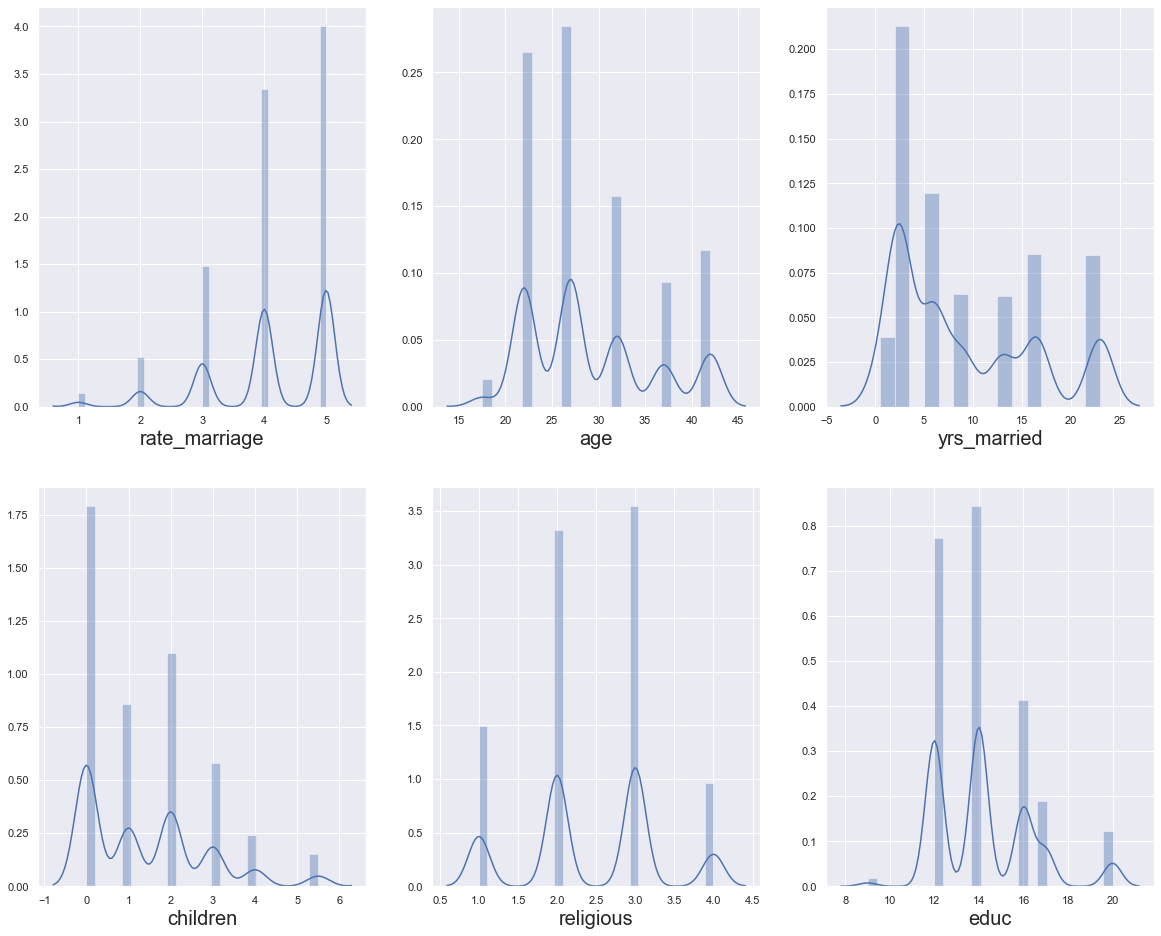

In [14]:
# let's see how data is distributed for every column
import seaborn as sns
sns.set()

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X.iloc[:,10:16]:
    if plotnumber<=6 :     # as there are 6 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

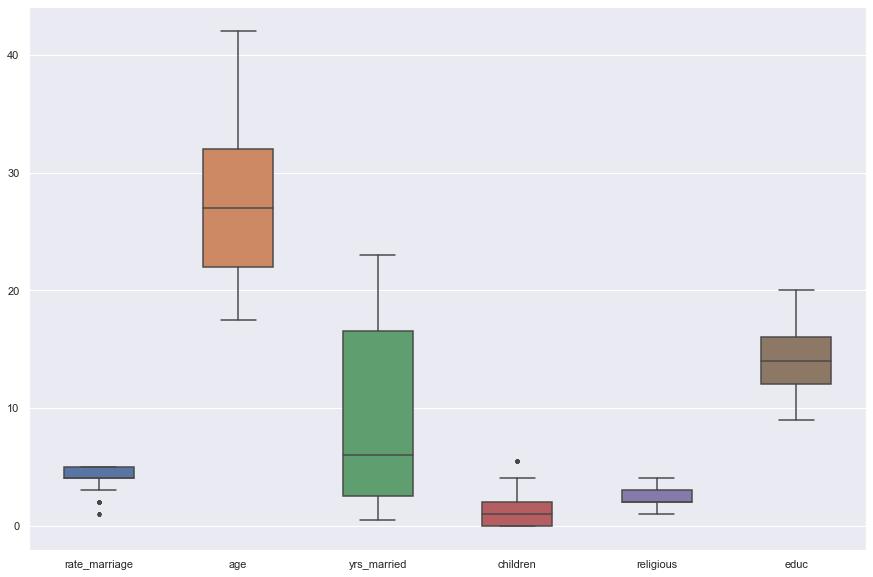

In [15]:
# Lets check for the outliers

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=X.iloc[:,10:16], width= 0.5,ax=ax,  fliersize=3)

In [16]:
# The range of data for every column is different so we are scaling down the features using Standard Scaler
from sklearn.preprocessing import StandardScaler 

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [17]:
X_scaled

array([[ 2.531984  , -0.88131913, -0.63614294, ...,  1.11844056,
         0.65334148,  1.28115287],
       [-0.3949472 ,  1.13466276, -0.63614294, ...,  1.11844056,
        -1.62378518, -0.09636416],
       [-0.3949472 ,  1.13466276, -0.63614294, ..., -0.97454634,
        -1.62378518,  0.82198052],
       ...,
       [-0.3949472 ,  1.13466276, -0.63614294, ..., -0.97454634,
        -0.48522185, -0.09636416],
       [-0.3949472 ,  1.13466276, -0.63614294, ..., -0.27688404,
         0.65334148, -0.09636416],
       [ 2.531984  , -0.88131913, -0.63614294, ..., -0.97454634,
        -0.48522185,  0.82198052]])

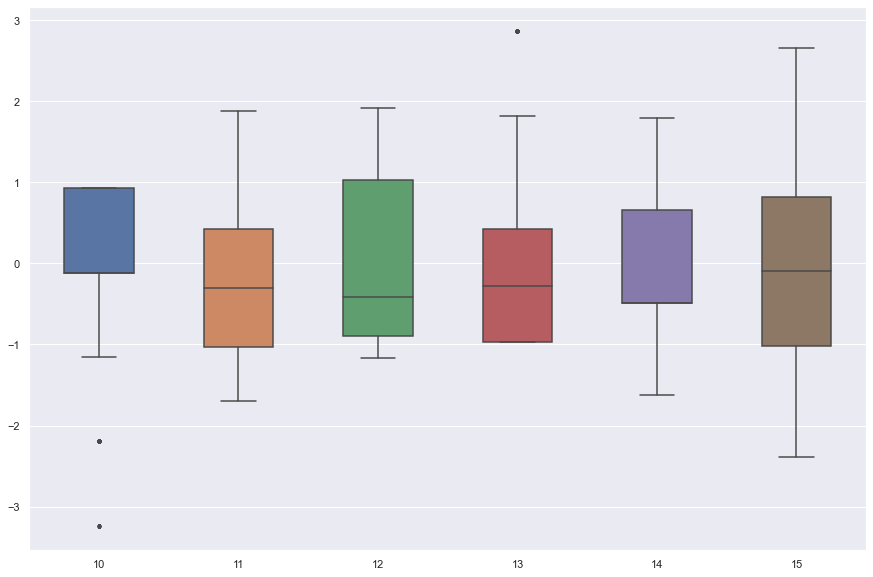

In [18]:
# Lets check for the outliers after Scaling the data

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=pd.DataFrame(X_scaled).iloc[:,10:16], width= 0.5,ax=ax,  fliersize=3)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.25, random_state = 335)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model = LogisticRegression()

In [22]:
model.fit(X_train,y_train)

LogisticRegression()

In [23]:
y_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7248743718592965

In [25]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[973, 100],
       [338, 181]], dtype=int64)

Text(30.5, 0.5, 'prediction')

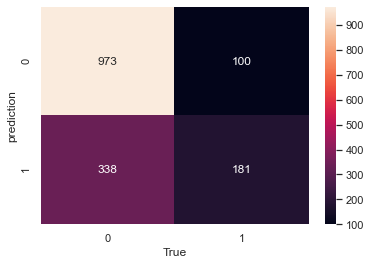

In [26]:
sns.heatmap(conf_mat, annot=True,fmt = '.3g')
plt.xlabel('True')
plt.ylabel('prediction')

In [27]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [28]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.7421815408085431

In [29]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9068033550792172

In [30]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8162751677852349

In [31]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.6277754733006876

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

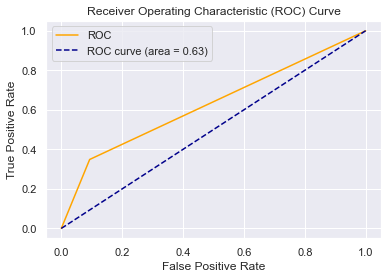

In [33]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()